<a href="https://colab.research.google.com/github/ThanhPhuongDA/DecisionTree/blob/main/Car_evaluation_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is to classify whether a car is in acceptable condition or unacceptable condition based on the sample dataset given with the following features:
buying_price: Buying Level or Capacity of the customer (Very High: vhigh, High: high, Low: low, Medium: med)

maint_cost: Maintenence Level (Very High: vhigh, High: high, Low: low, Medium: med)

doors: Number of doors in the car (2, 3, 4, and 5 or more)

person_capacity: capacity in terms of persons to carry (2, 4, and more)

lug_boot: The size of the Luggage Boot (small, med, big)

safety: Safety Level of Car (high, med, low)

class: Unacceptable, Acceptable, VeryGood, Good

What to do: 
Analyse different physical qualifications of a car and recommend a user in their decision-making process based on the cars’ attributes.



In [92]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import preprocessing


Import the dataset

In [93]:
df = pd.read_csv('/car_evaluation.csv')

In [94]:
df.head()

,buying_price,maint_cost,doors,person_capacity,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [95]:
df.shape

(1728, 7)

In [96]:
df.columns


Index(['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot',
       'safety', 'class'],
      dtype='object')

The dataset contains 1728 observations with 7 features:
buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot',
       'safety', 'class'.
All the variables are in categorical format


In [97]:
#Check if there is any null data
df.isnull().sum()

buying_price       0
maint_cost         0
doors              0
person_capacity    0
lug_boot           0
safety             0
class              0
dtype: int64

There is no null values present in the dataset

In [98]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

There are unacceptable 1209 car samples, while the number of acceptable cars are 384, good: 69, vgood:65


I am going to replace good and vgood into acc

In [99]:
df['class']=df['class'].replace(['good','vgood'],['acc','acc'])



In [91]:
df['class'].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

There are unacceptable 1209 car samples, while the number of acceptable cars are 518 in total


DATA VISUALIZATION

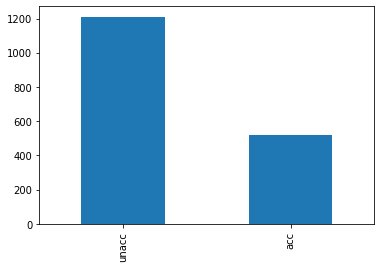

In [100]:
df['class'].value_counts().plot(kind='bar')
plt.show()

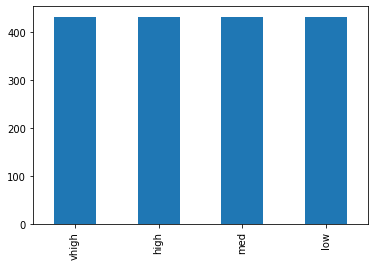

In [101]:
df['buying_price'].value_counts().plot(kind = 'bar')
plt.show()

The dataset contains an approximately similar number of car whose buying prices are vhigh, high, medium, and low




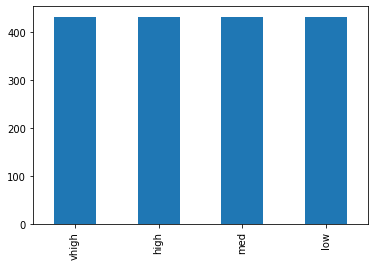

In [102]:
df['maint_cost'].value_counts().plot(kind = 'bar')
plt.show()


The dataset contains an approximately similar number of car whose main costs are vhigh, high, medium, and low


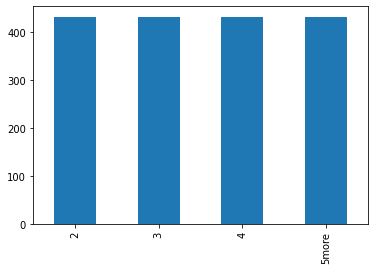

In [103]:
df['doors'].value_counts().plot(kind = 'bar')
plt.show()

The dataset contains an approximately similar number of car whose doors are 2, 3, medi4um, and 5 more


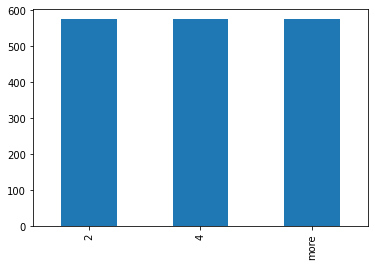

In [104]:
df['person_capacity'].value_counts().plot(kind = 'bar')
plt.show()

The dataset contains an approximately similar number of car whose person_capacity are 2, 4 and more

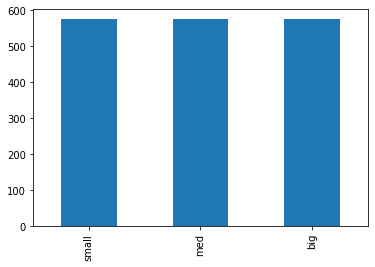

In [105]:
df['lug_boot'].value_counts().plot(kind = 'bar')
plt.show()

The dataset contains an approximately similar number of car whose size of the Luggage Boots are small, medium, and big

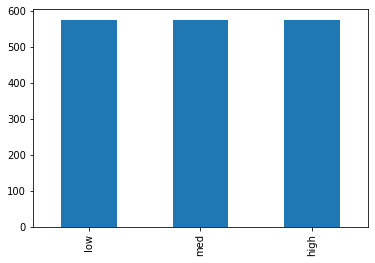

In [106]:
df['safety'].value_counts().plot(kind = 'bar')
plt.show()


The dataset contains an approximately similar number of low, medium, and high safety condition cars

I'd plot the variable buying price variables’ distribution of the different categories with the class variable.

In [108]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


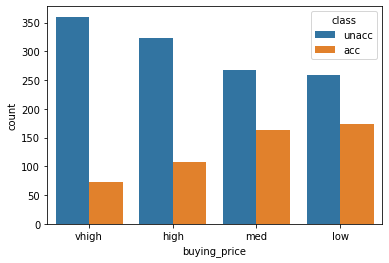

In [110]:
sns.countplot(df['buying_price'], hue = df['class'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


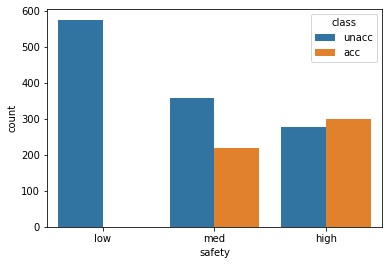

In [111]:
sns.countplot(df['safety'], hue = df['class'])
plt.show()


Cars with high safety level tend to be more acceptable than low and medium safety levels

In [112]:
X = df.drop(['class'], axis = 1)
y = df['class']


Because all variables are in categorical format, I'd convert the date format into dummy varaibles by defining the categories of each of the variables in ascending order. 

-Method: Use a sklearn package- OrdinalEncoder using a given list of categories. 
For instance, after the conversion, the values of buying_price_category will convert into [0, 1, 2, 3] from [‘low’, ‘med’, ‘high’, ‘vhigh’] and for the variable doors: after the conversion of the categories will be: [‘2’, ‘3’, ‘4’, ‘5more’] → [0, 1, 2, 3]



In [113]:
from sklearn.preprocessing import OrdinalEncoder
buying_price_category = ['low', 'med', 'high', 'vhigh']
maint_cost_category = ['low', 'med', 'high', 'vhigh']
doors_category = ['2', '3', '4', '5more']
person_capacity_category = ['2','4', 'more']
lug_boot_category = ['small','med', 'big']
safety_category = ['low', 'med', 'high']
all_categories = [buying_price_category, maint_cost_category,doors_category,person_capacity_category,lug_boot_category,safety_category]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( df[['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot', 'safety']])


TRAIN TEST DATA SPLIT
Split the dataset with a split ratio: 70%-30% for training and test data, respectively

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)


MODEL DEVELOPMENT

In [116]:
model = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [117]:
y_preds = model.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         acc       0.82      0.64      0.72       145
       unacc       0.87      0.95      0.91       374

    accuracy                           0.86       519
   macro avg       0.85      0.79      0.81       519
weighted avg       0.86      0.86      0.86       519




The above report displays the precision, recall, f1 score for acceptable and unacceptable classes. The precision, recall, f1 scores are 82%, 64%, and 72%, respectively, where the number of acceptable conditioned cars samples (support) is 145. On the other hand, the precision, recall, f1 score for the unacceptable class are 87%, 95%, and 91%, respectively, where the number of unacceptable car samples is (support) 374.
 From this report, we can see that the model performs better for the unacceptable car samples than the acceptable cars, which is an interesting finding.

The overall accuracy is 86%.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


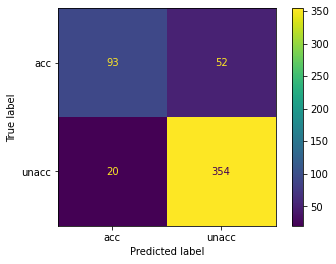

In [119]:
plot_confusion_matrix(model,X_test,y_test)

From the confusion matrix:

· Number of True positives: 93

· Number of False positives: 52

· Number of False negatives: 20

· Number of True negatives: 354





**Post** **Analysis**


We can visualize the tree and understand how the model predicts whether a car is acceptable or not

In [120]:
model.feature_importances_

array([0.14455638, 0.        , 0.        , 0.50478504, 0.        ,
       0.35065858])

As it can be seen, among 6 independent variables, only 3 variables have a deciding factor on classification of the cars: buying_price, person_capacity, safety. Person_capacity is the most important factor, followed by safety and buying_price is the least important factor

In [125]:
from sklearn.tree import plot_tree

[Text(0.3333333333333333, 0.875, 'safety <= 0.5\ngini = 0.427\nsamples = 1209\nvalue = [373, 836]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 409]'),
 Text(0.5, 0.625, 'person_capacity <= 0.5\ngini = 0.498\nsamples = 800\nvalue = [373, 427]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 262\nvalue = [0, 262]'),
 Text(0.6666666666666666, 0.375, 'buying_price <= 1.5\ngini = 0.425\nsamples = 538\nvalue = [373, 165]'),
 Text(0.5, 0.125, 'gini = 0.173\nsamples = 271\nvalue = [245, 26]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.499\nsamples = 267\nvalue = [128, 139]')]

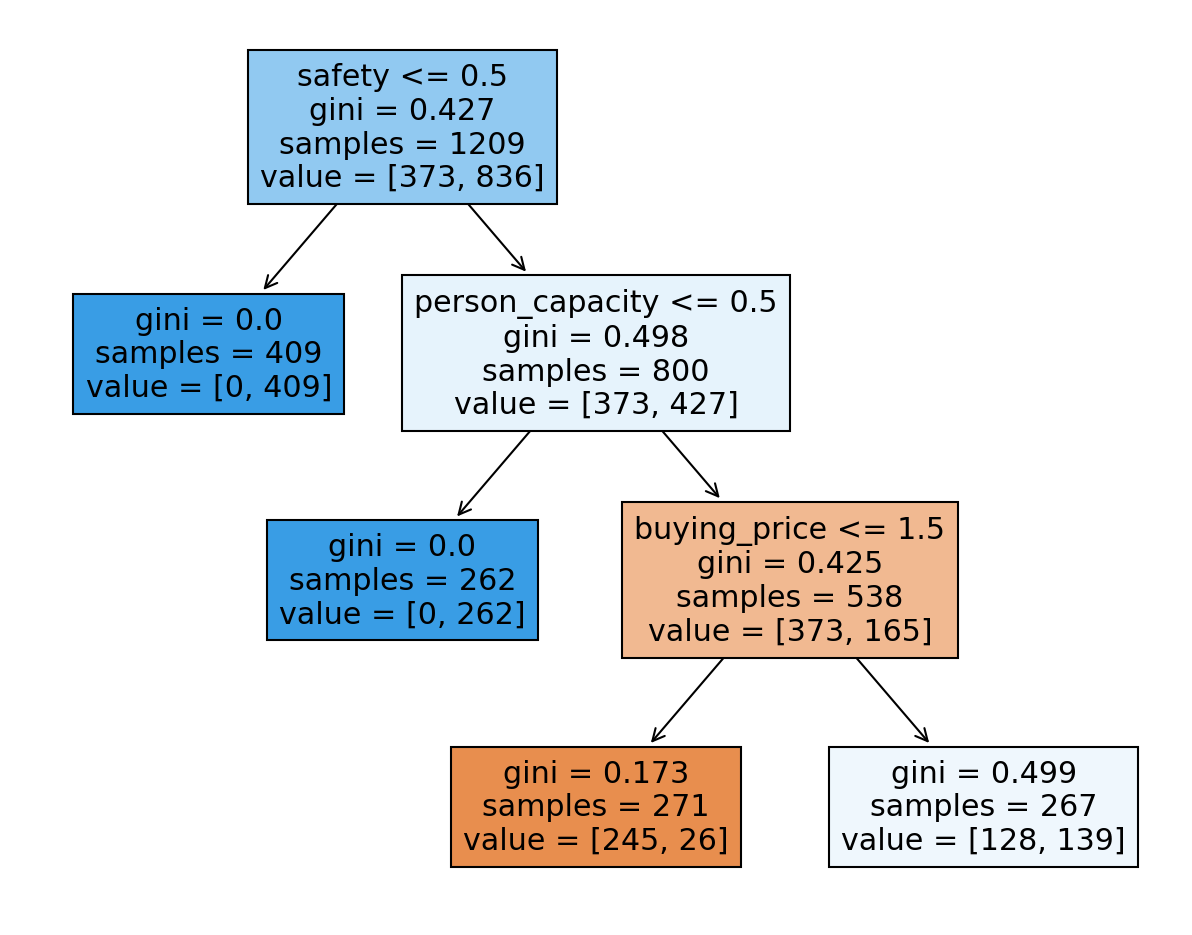

In [126]:
plt.figure(figsize=(10,8),dpi=150)
plot_tree(model,feature_names=['buying_price', 'maint_cost', 'doors', 'person_capacity', 'lug_boot',
       'safety'],filled=True)

From the tree: the root node is the safety variable, splitting the safety variable at 0.5, meaning that, it will create two nodes- one with {low} safety, while the other will contain {med, high} safety car samples.